#### 가이드 코드

In [ ]:
############ 강사님
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# 1. 데이터 로드
data = load_breast_cancer()
X=data.data
y=data.target

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 파이프 라인 구성
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svd', TruncatedSVD(n_components=10)),
    ('logreg', LogisticRegression(max_iter=100, random_state=42))
])

param_grid = {
    'svd__n_components': [2, 5, 10],
    'logreg__C': [0.1, 1, 10]
}

# Grid SearchCV를 이용한 하이퍼 파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#
print("Best Parameters found: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


# 사용자 평가 함수 정의
def evaluate_model(model, X_test, y_test):
  # 예측 수행
  y_pred = model.predict(X_test)

  # 정확도 계산
  accuracy = accuracy_score(y_test, y_pred)

  # 분류 보고서
  report = classification_report(y_test, y_pred)

  # ROC AUC
  y_pred_prob = model.predict_proba(X_test)[:, 1]
  roc = roc_auc_score(y_test, y_pred_prob)
  # 결과 출력
  print(f"Test Accuracy: {accuracy:.4f}")
  print(f"Classification Report:\n", report)
  print(f"ROC AUC Score: {roc:.4f}")

evaluate_model(grid_search, X_test, y_test)


Best Parameters found:  {'logreg__C': 1, 'svd__n_components': 10}
Best Score:  0.9758241758241759
Test Accuracy: 0.9825
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

ROC AUC Score: 0.9977


California_housing 데이터셋으로 아래사항을 참조하여 주택가격을 예측하는 회귀모델을 개발하세요 (파이프라인 사용 가능).
- 전체 회귀모델을 적용 (9개 이상)
- 각 모델별 최적 하이퍼파라미터 - GridSearchCV 활용
- 평가지수 MSE 기준으로 가장 성능이 좋은 모델과 파라미터를 적용하여 평가 결과를 출력

In [5]:
# 1. 데이터 로드
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

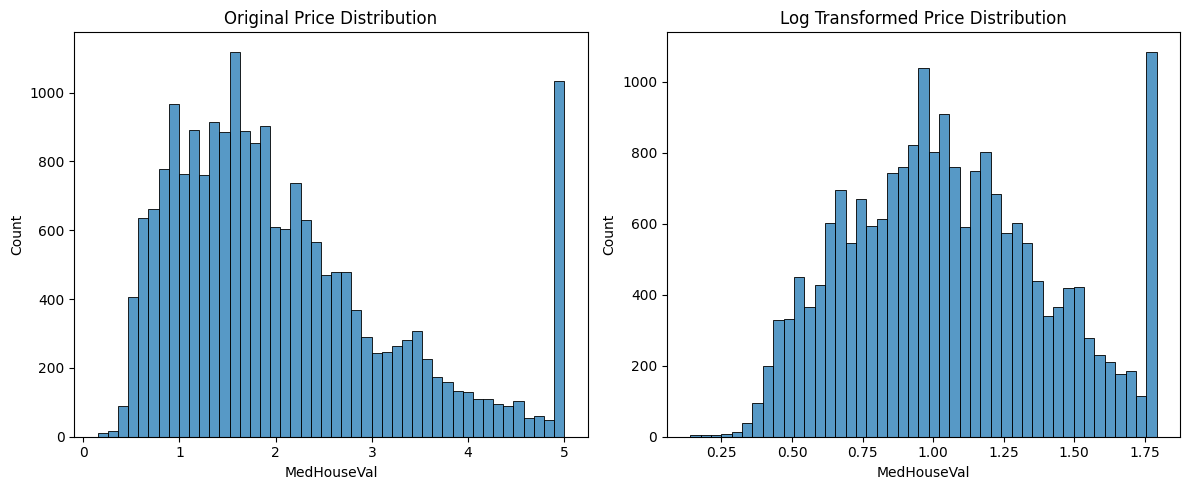

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)

sns.histplot(df['MedHouseVal'], ax=axs[0])
axs[0].set_title('Original Price Distribution')

y_log = np.log1p(df['MedHouseVal'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')

plt.tight_layout()
plt.show()

<Axes: >

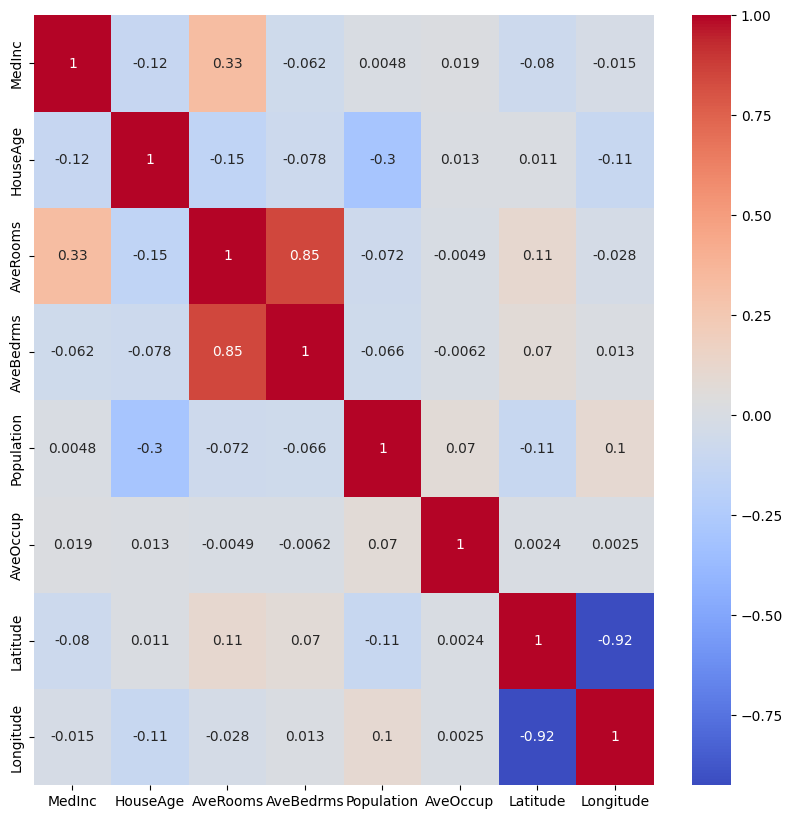

In [9]:
cdf = df[
    [
        "MedInc",
        "HouseAge",
        "AveRooms",
        "AveBedrms",
        "Population",
        "AveOccup",
        "Latitude",
        "Longitude",
    ]
]

corr = cdf.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

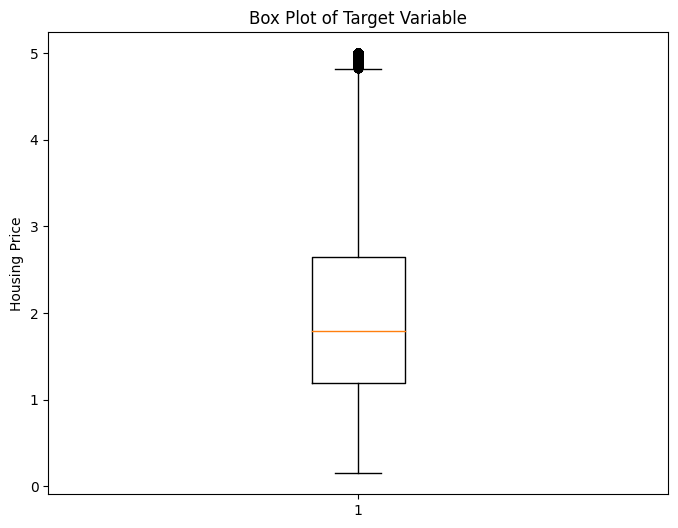

In [10]:
## 이상치 확인
housing=fetch_california_housing()
y=housing.target
# box plot
plt.figure(figsize=(8,6))
plt.boxplot(y)
plt.title("Box Plot of Target Variable")
plt.ylabel("Housing Price")
plt.show()

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=housing.feature_names)
df['Target'] = y  # Add the target variable to the DataFrame

# Calculate IQR for the target variable
Q1 = df['Target'].quantile(0.25)
Q3 = df['Target'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = df[(df['Target'] < lower_bound) | (df['Target'] > upper_bound)]

# Output the observations corresponding to outliers
print(len(outliers))
print(lower_bound)
print(upper_bound)
outliers[:5]

1071
-0.9808749999999995
4.824124999999999


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001


In [12]:
## Outlier 제거 후
## 20640-1071 = 19569

df_no_outliers=df[(df['Target']>=lower_bound) & (df['Target']<=upper_bound)]
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19569 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      19569 non-null  float64
 1   HouseAge    19569 non-null  float64
 2   AveRooms    19569 non-null  float64
 3   AveBedrms   19569 non-null  float64
 4   Population  19569 non-null  float64
 5   AveOccup    19569 non-null  float64
 6   Latitude    19569 non-null  float64
 7   Longitude   19569 non-null  float64
 8   Target      19569 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


(19569,)


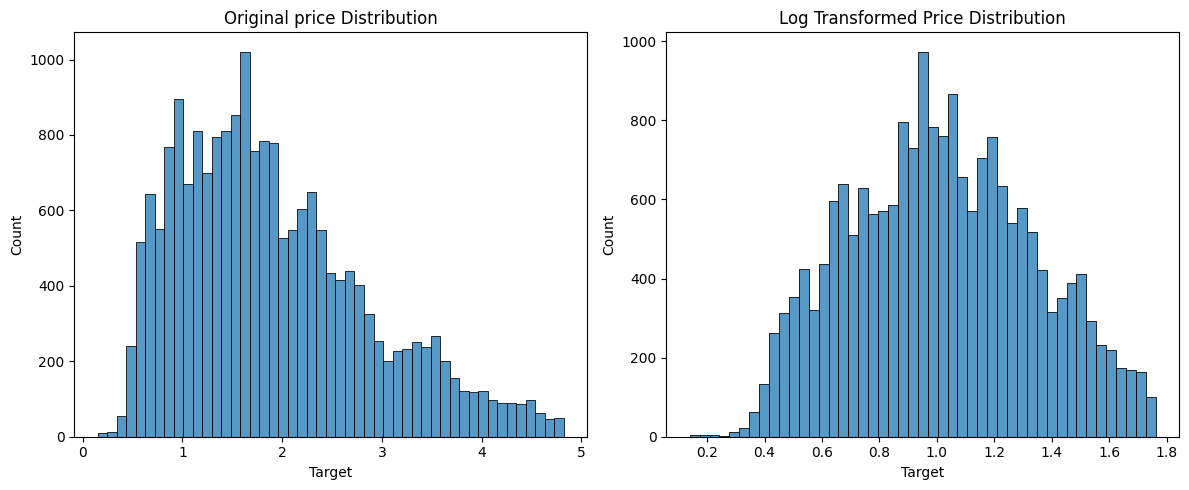

In [13]:
# histplot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axs = plt.subplots(figsize=(12,5), ncols=2, nrows=1)

sns.histplot(df_no_outliers['Target'], ax=axs[0])
axs[0].set_title('Original price Distribution')

y_log = np.log1p(df_no_outliers['Target'])
sns.histplot(y_log, ax=axs[1])
axs[1].set_title('Log Transformed Price Distribution')
print(y_log.shape)
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 1. 데이터

# 파생 변수 생성
df_no_outliers['BedroomsPerRoom'] = df_no_outliers['AveBedrms'] / df_no_outliers['AveRooms']

X = df_no_outliers.drop(['Target'], axis=1)
y = df_no_outliers['Target']

# 데이터셋을 학습 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 수치형 피처 목록
numerical_features = X.columns.tolist()

# 전처리기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ])

# 모델과 하이퍼파라미터 그리드 딕셔너리
models = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {}
    },
    "Ridge": {
        "model": Ridge(random_state=42),
        "params": {
            "classifier__alpha": [0.01, 0.1, 1, 10, 100]
        }
    },
    "Lasso": {
        "model": Lasso(random_state=42),
        "params": {
            "classifier__alpha": [0.01, 0.1, 1, 10, 100]
        }
    },
    "Elastic Net": {
        "model": ElasticNet(random_state=42),
        "params": {
            "classifier__alpha": [0.01, 0.1, 1, 10, 100],
            "classifier__l1_ratio": [0.1, 0.5, 0.9]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(random_state=42),
        "params": {
            "classifier__max_depth": [None, 10, 20, 30],
            "classifier__min_samples_split": [2, 10, 20],
            "classifier__min_samples_leaf": [1, 5, 10]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__max_depth": [None, 10, 20],
            "classifier__min_samples_split": [2, 10],
            "classifier__min_samples_leaf": [1, 5]
        }
    },
    "SVR": {
        "model": SVR(),
        "params": {
            "classifier__C": [0.1, 1, 10],
            "classifier__kernel": ['linear', 'rbf']
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 0.5],
            "classifier__max_depth": [3, 5, 10]
        }
    },
    "AdaBoost": {
        "model": AdaBoostRegressor(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 0.5]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 0.5],
            "classifier__max_depth": [3, 5, 10]
        }
    },
    "LightGBM": {
        "model": LGBMRegressor(random_state=42),
        "params": {
            "classifier__n_estimators": [50, 100, 200],
            "classifier__learning_rate": [0.01, 0.1, 0.5],
            "classifier__num_leaves": [31, 62, 124]
        }
    }
}

# 모델 학습 및 평가
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

best_estimators = {}
results = []

for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model_info["model"])
    ])

    grid_search = GridSearchCV(estimator=pipeline, param_grid=model_info["params"], cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_estimators[model_name] = grid_search.best_estimator_
    mse, r2 = evaluate_model(grid_search.best_estimator_, X_test, y_test)

    results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        'MSE': mse,
        'R2': r2
    })

    print(f"모델: {model_name}")
    print(f"최적 하이퍼파라미터: {grid_search.best_params_}")
    print(f"MSE: {mse:.2f}")
    print(f"R2: {r2:.2f}")
    print("="*60)

# 최적 모델을 사용한 예측 시각화
results_df = pd.DataFrame(results).sort_values(by='MSE', ascending=True)
best_model_name = results_df.iloc[0]['Model']
best_model = best_estimators[best_model_name]

# 최적 모델로 예측
y_pred_best = best_model.predict(X_test)

# 예측 시각화
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.show()

# 주요 피처 중요도 시각화
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_importances = best_model.named_steps['classifier'].feature_importances_
    feature_series = pd.Series(data=feature_importances, index=numerical_features).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_series, y=feature_series.index)
    plt.title(f'Feature Importances - {best_model_name}')
    plt.show()

results_df = pd.DataFrame(results).sort_values(by='MSE', ascending=True)
print("Regression Model Results")
display(results_df)

# 테스트용 데이터 셋 생성
X_test_range = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 최적 모델로 예측
y_pred_range = best_model.predict(X_test_range)

# 예측 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_train[:, 0], y_train, alpha=0.3, label='Training Data')
plt.scatter(X_test_range, y_pred_range, color='red', label='Predicted Data')
plt.xlabel('Feature 1')
plt.ylabel('Target')
plt.title(f'Predicted Values for Test Range - {best_model_name}')
plt.legend()
plt.show()

모델: Linear Regression
최적 하이퍼파라미터: {}
MSE: 0.36
R2: 0.61
모델: Ridge
최적 하이퍼파라미터: {'classifier__alpha': 0.01}
MSE: 0.36
R2: 0.61
모델: Lasso
최적 하이퍼파라미터: {'classifier__alpha': 0.01}
MSE: 0.36
R2: 0.61
모델: Elastic Net
최적 하이퍼파라미터: {'classifier__alpha': 0.01, 'classifier__l1_ratio': 0.1}
MSE: 0.36
R2: 0.61
모델: Decision Tree
최적 하이퍼파라미터: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
MSE: 0.28
R2: 0.69
모델: Random Forest
최적 하이퍼파라미터: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
MSE: 0.20
R2: 0.79
모델: SVR
최적 하이퍼파라미터: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
MSE: 0.24
R2: 0.74


KeyboardInterrupt: 

In [3]:
print("Regression Model Results")
display(results_df)

Regression Model Results


NameError: name 'results_df' is not defined